In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Housing.csv")

In [3]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [7]:
#Replacing yes and no with 1 and 0
for column in data.columns:
    if "yes" in data[column].values or "no" in data[column].values:
        data[column] = data[column].map({"yes": 1, "no": 0})

data.furnishingstatus.value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    int64 
 6   guestroom         545 non-null    int64 
 7   basement          545 non-null    int64 
 8   hotwaterheating   545 non-null    int64 
 9   airconditioning   545 non-null    int64 
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    int64 
 12  furnishingstatus  545 non-null    object
dtypes: int64(12), object(1)
memory usage: 55.5+ KB


In [9]:
data1 = data.copy()
features1 = ['area']  # Assuming 'area' is the feature you want to check for outliers

for feature in features1:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    data = data[(data[feature] >= (Q1 - 1.5 * IQR)) & (data[feature] <= (Q3 + 1.5 * IQR))]

# Display the first few rows of the original data
display(data1.head())

print('\n\033[1mInference:\033[0m\nBefore removal of outliers, The dataset had {} samples.'.format(data1.shape[0]))
print('After removal of outliers, The dataset now has {} samples.'.format(data.shape[0]))


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished



Inference:
Before removal of outliers, The dataset had 545 samples.
After removal of outliers, The dataset now has 533 samples.


In [11]:
#Replacing and droping the furnishingstatus column

data = data.join(pd.get_dummies(data.furnishingstatus)).drop(['furnishingstatus'], axis=1)
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,True,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,True,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,False,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,True,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,False,False,True
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,False,True,False
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,False,False,True
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,True,False,False


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 533 entries, 0 to 544
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   price            533 non-null    int64
 1   area             533 non-null    int64
 2   bedrooms         533 non-null    int64
 3   bathrooms        533 non-null    int64
 4   stories          533 non-null    int64
 5   mainroad         533 non-null    int64
 6   guestroom        533 non-null    int64
 7   basement         533 non-null    int64
 8   hotwaterheating  533 non-null    int64
 9   airconditioning  533 non-null    int64
 10  parking          533 non-null    int64
 11  prefarea         533 non-null    int64
 12  furnished        533 non-null    bool 
 13  semi-furnished   533 non-null    bool 
 14  unfurnished      533 non-null    bool 
dtypes: bool(3), int64(12)
memory usage: 71.9 KB


In [13]:
from sklearn.model_selection import train_test_split

x = data.drop(['price'],axis=1)
y = data['price']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [15]:
train_data = x_train.join(y_train)

In [16]:
train_data

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished,price
457,3000,3,1,1,0,0,0,0,1,0,0,False,False,True,3115000
44,6000,4,2,4,1,0,0,0,1,1,0,True,False,False,7560000
397,5900,2,1,1,1,0,0,0,0,1,0,True,False,False,3500000
387,4240,3,1,2,1,0,0,0,1,0,0,False,True,False,3500000
464,4500,2,1,2,1,0,0,1,0,1,0,False,True,False,3080000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,3640,2,1,1,1,0,0,0,0,0,0,False,False,True,2345000
466,3090,3,1,2,0,0,0,0,0,0,0,False,True,False,3010000
48,4300,3,2,2,1,0,1,0,0,1,0,False,False,True,7455000
222,9166,2,1,1,1,0,1,0,1,2,0,False,True,False,4760000


array([[<Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'stories'}>,
        <Axes: title={'center': 'mainroad'}>,
        <Axes: title={'center': 'guestroom'}>],
       [<Axes: title={'center': 'basement'}>,
        <Axes: title={'center': 'hotwaterheating'}>,
        <Axes: title={'center': 'airconditioning'}>],
       [<Axes: title={'center': 'parking'}>,
        <Axes: title={'center': 'prefarea'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

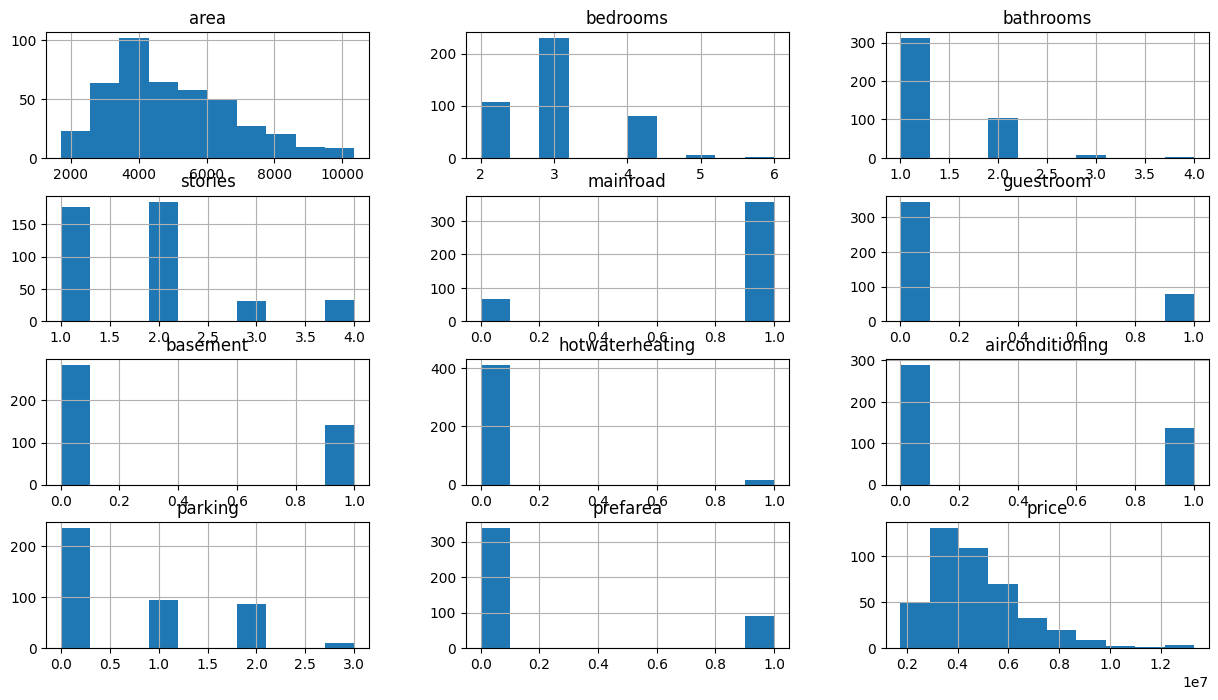

In [17]:
train_data.hist(figsize=(15,8))

<Axes: >

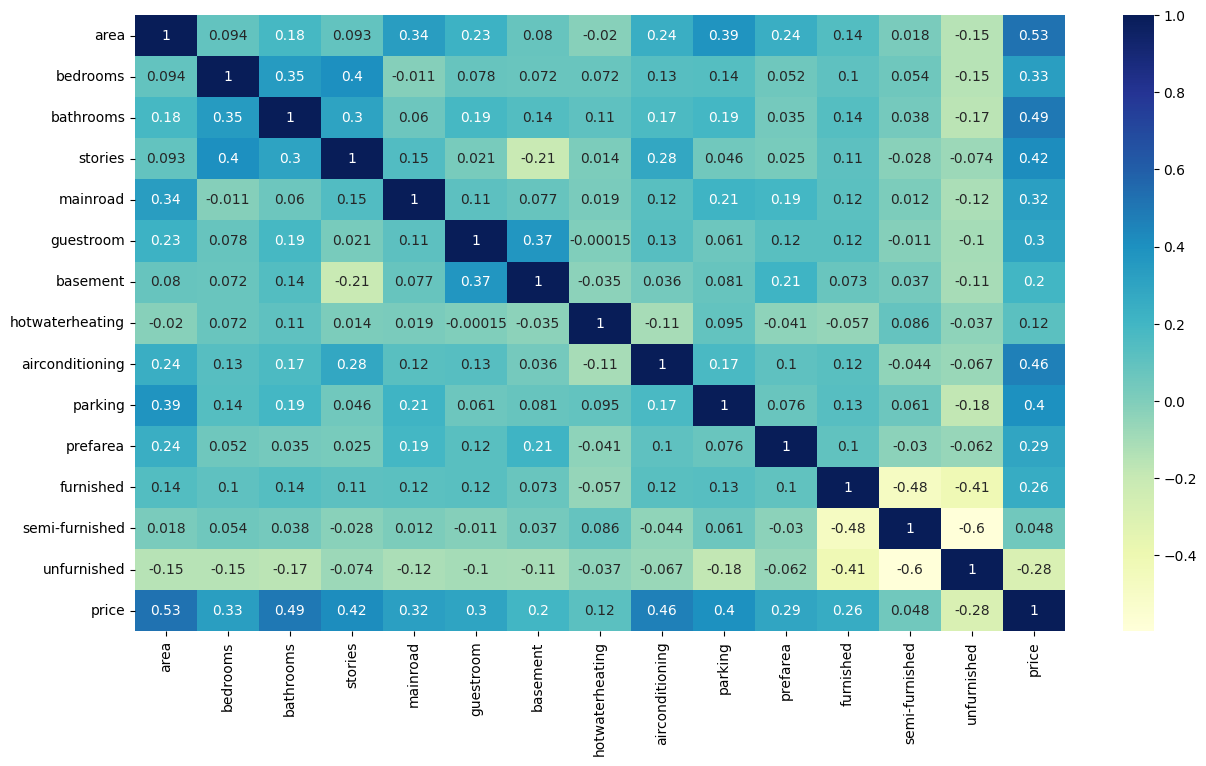

In [18]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

<Axes: >

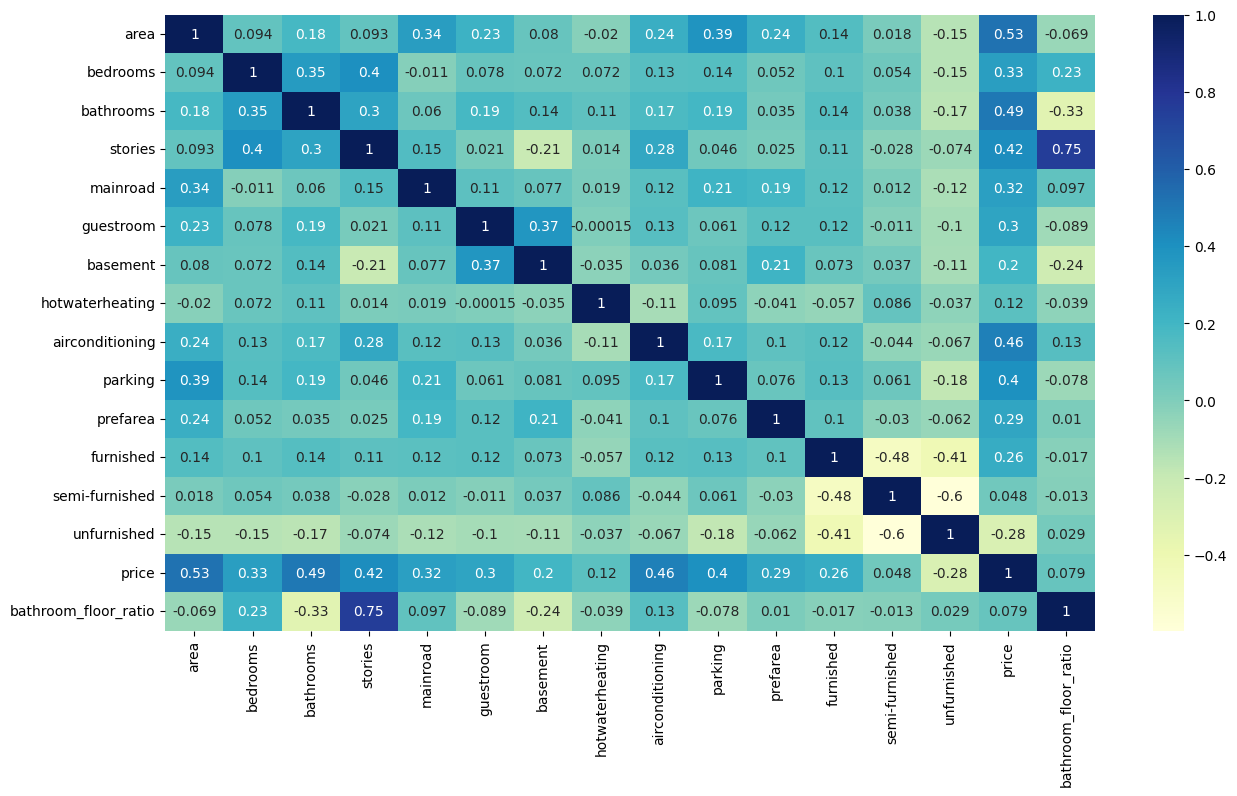

In [19]:
#train_data['total_rooms'] = train_data['bedrooms'] + train_data['bathrooms'] + train_data['guestroom'] + train_data['parking']
#train_data['average_floor'] = train_data['area'] * train_data['stories']
train_data['bathroom_floor_ratio'] = train_data['stories'] / train_data['bathrooms']
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [20]:
from sklearn.linear_model import LinearRegression



test_data = x_test.join(y_test)
#test_data['total_rooms'] = test_data['bedrooms'] + test_data['bathrooms'] + test_data['guestroom']+test_data['parking']
#test_data['average_floor'] = test_data['area'] * test_data['stories']
#test_data['bathroom_floor_ratio'] = test_data['stories'] / test_data['bathrooms']

reg = LinearRegression()
reg.fit(x_train,y_train)
score = reg.score(x_test,y_test)
print(f"Score on test set: {score}")

Score on test set: 0.6842869038719519


In [21]:
from sklearn.ensemble import RandomForestRegressor

"""forest = RandomForestRegressor()
forest.fit(x_train,y_train)
forest.score(x_test,y_test)"""

'forest = RandomForestRegressor()\nforest.fit(x_train,y_train)\nforest.score(x_test,y_test)'

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [100, 200, 300],
    "min_samples_split": [2, 4],
    "max_depth": [None, 4, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)
grid_search.fit(x_train,y_train)
best_estimator = grid_search.best_estimator_
score_on_test_set = best_estimator.score(x_test, y_test)

print(f"Score on test set: {score_on_test_set}")

Score on test set: 0.6627855155272153


Score on test set: 0.7106717844000633


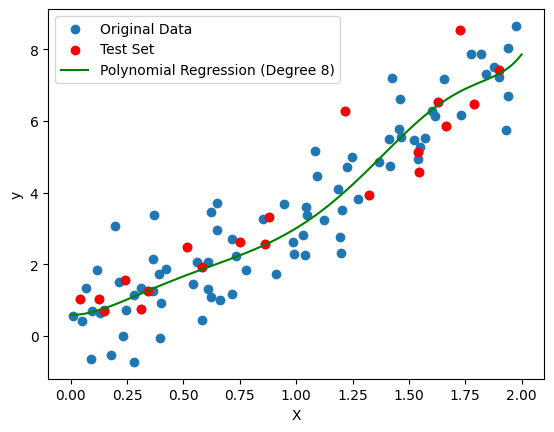

In [23]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate some sample data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 3 * X + 0.5 * X**2 + np.random.randn(100, 1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial regression with degree=8
degree = 8
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print the mean squared error on the test set
mse = mean_squared_error(y_test, y_pred)
print(f"Score on test set: {mse}")

# Plot the original data and the polynomial regression model
plt.scatter(X, y, label='Original Data')
plt.scatter(X_test, y_test, color='red', label='Test Set')
x_values = np.linspace(0, 2, 100).reshape(-1, 1)
y_values = model.predict(x_values)
plt.plot(x_values, y_values, color='green', label=f'Polynomial Regression (Degree {degree})')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

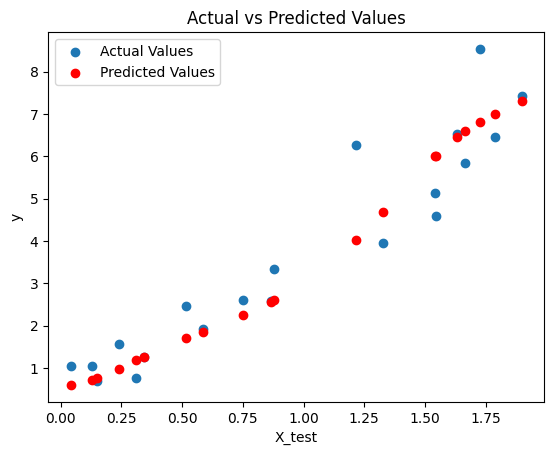

In [24]:
plt.scatter(X_test, y_test, label='Actual Values')
plt.scatter(X_test, y_pred, label='Predicted Values', color='red')
plt.xlabel('X_test')
plt.ylabel('y')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

Score on test set (Lasso): 0.6356657267410747


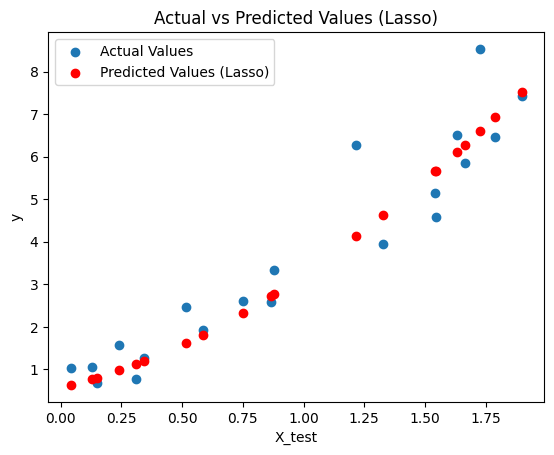

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Generate some sample data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 3 * X + 0.5 * X**2 + np.random.randn(100, 1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lasso regression with polynomial features and feature scaling
degree = 5
alpha = 0.01  # Regularization strength (adjust as needed)

lasso_model = make_pipeline(
    PolynomialFeatures(degree),
    StandardScaler(),  # Add feature scaling
    Lasso(alpha=alpha, max_iter=10000)  # Increase max_iter
)
lasso_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lasso = lasso_model.predict(X_test)

# Calculate and print the mean squared error on the test set
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f"Score on test set (Lasso): {mse_lasso}")

# Plot the actual vs predicted values for Lasso regression
plt.scatter(X_test, y_test, label='Actual Values')
plt.scatter(X_test, y_pred_lasso, label='Predicted Values (Lasso)', color='red')
plt.xlabel('X_test')
plt.ylabel('y')
plt.title('Actual vs Predicted Values (Lasso)')
plt.legend()
plt.show()

In [46]:
s = "housing.txt"
letter = "e"
def fisier(s):
    with open(s, "r", encoding="utf-8") as file:
        for line in file:
            for word in line.split():
                if letter in word:
                    print(word)

fisier(s)

ger
heryfyf
oooeee
gggeeeee


In [65]:
class UTM:
    def __init__(self, file_path,string):
        self.file_path = file_path
        self.string = string
        
    def fisier(self, letter):
        with open(s, "r", encoding="utf-8") as file:
            for line in file:
                for word in line.split():
                    if letter in word:
                        print(word)

    def palindrome(self):
        palin = self.string[::-1]
        if palin == self.string:
            print("Yes")
        else:
            print("No")
            
utm = UTM("housing.txt","ama")
utm.palindrome()

Yes
